## Project #2: Predicting House Prices on Kaggle

<h2>Initializing Packages and Importing Data</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999

#Kaggle divides the dataset already into Train and Test data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

<h2>Taking a peak at our data</h2>

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Check for duplicates
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


<h2>1. Exploratory Data Analysis (EDA)</h2>
<h3>1.1. Univariate Distribution</h3>
<h4>1.1.1.  Distribution of the target variable : Home Sales Price</h4>

C:\Users\Utilizador\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'House Sales Price Distribution')

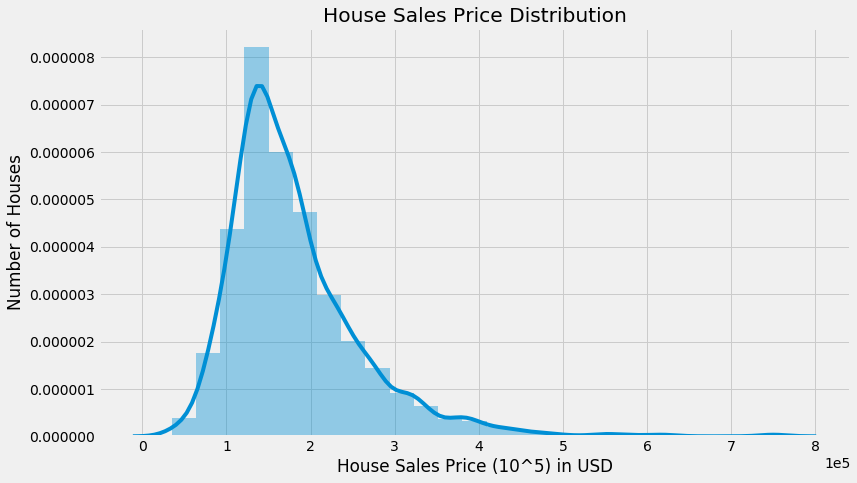

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.SalePrice, bins = 25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("House Sales Price (10^5) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")



In [7]:
print ("Skew is:", train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

Skew is: 1.8828757597682129
Kurtosis: 6.536282


C:\Users\Utilizador\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'House Sales Price Distribution')

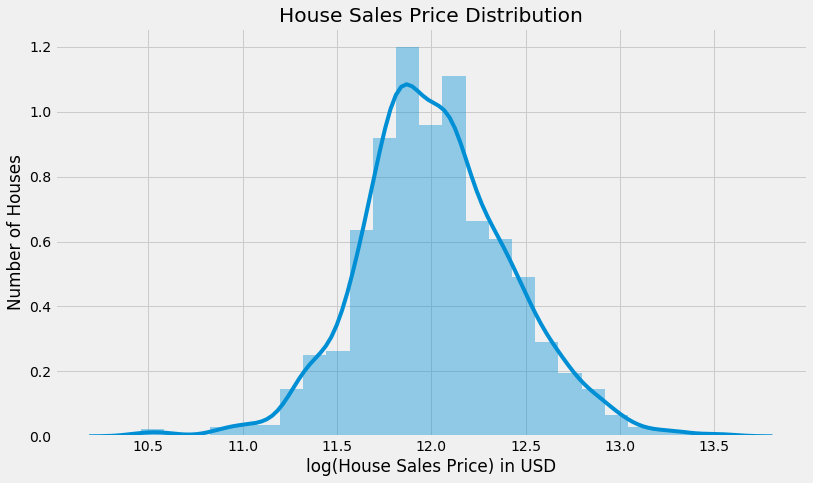

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(np.log(train.SalePrice), bins = 25)
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")



In [9]:
print ("Skew is:", np.log(train.SalePrice).skew())
print("Kurtosis: %f" % np.log(train.SalePrice).kurt())

Skew is: 0.12133506220520406
Kurtosis: 0.809532


In [10]:
#Converting SalePrice to log value
train.SalePrice = np.log(train.SalePrice)

<h4>1.1.2. Numerical Variables</h4>

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [12]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64 

BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


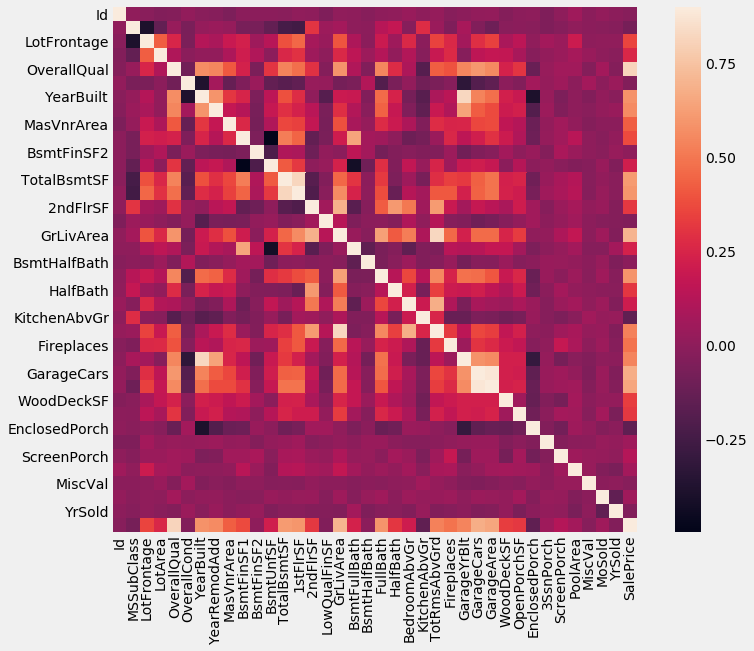

In [13]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.9, square=True);

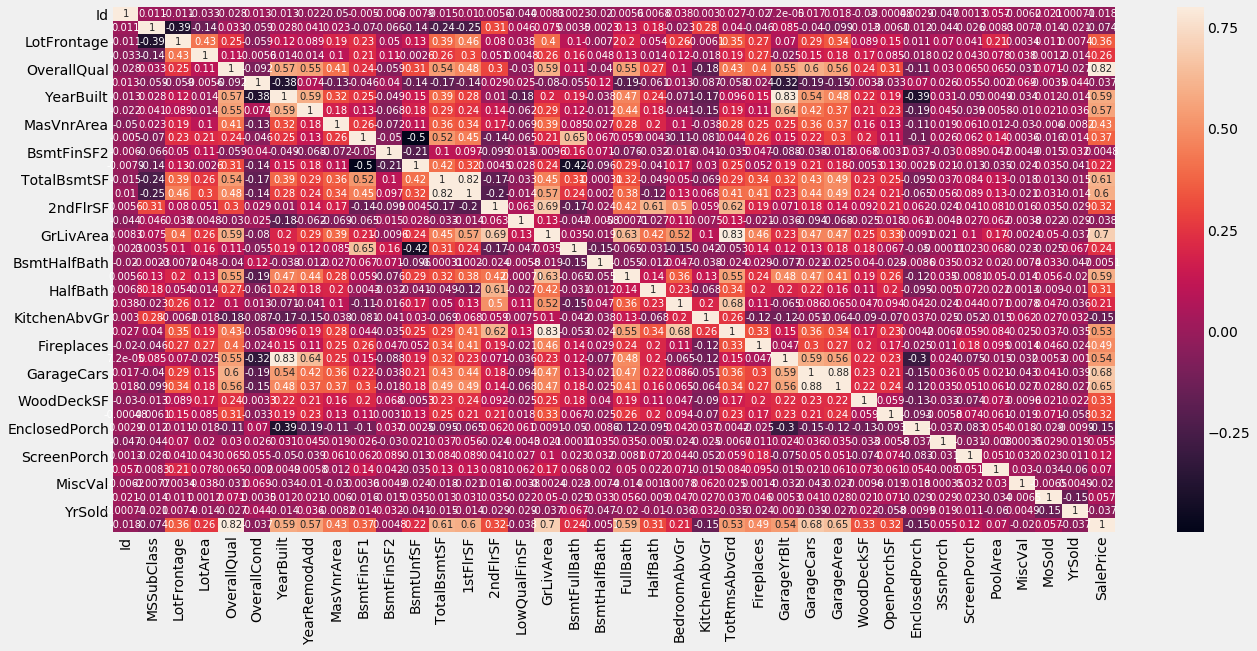

In [14]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True);

In [15]:
#Correlations Between Attributes
#Pearson’s Correlation
#Coefficient, that assumes a normal distribution of the attributes involved"""

s = corr.unstack()
#s.sort_values(kind="quicksort")
s[(abs(s)>0.6) & (abs(s) < 1)]

OverallQual   GarageCars      0.600671
              SalePrice       0.817184
YearBuilt     GarageYrBlt     0.825667
YearRemodAdd  GarageYrBlt     0.642277
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.612134
1stFlrSF      TotalBsmtSF     0.819530
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     2ndFlrSF        0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.700927
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt       0.825667
              YearRemodAdd    0.642277
GarageCars    OverallQual     0.600671
              GarageArea 

<h4>1.1.3. Categorical Variables</h4>
<h5>1.1.3.1. Distribution of the BedroomAbvGr variable</h5>

In [16]:
train.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

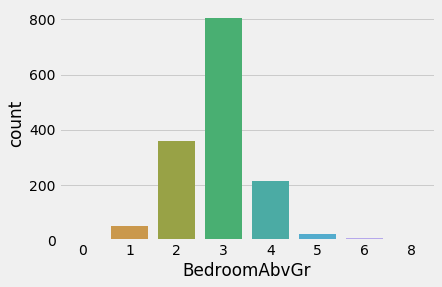

In [17]:
sns.countplot(train.BedroomAbvGr)

<h5>1.1.3.2. Distribution of the TotRmsAbvGrd variable</h5>

In [18]:
train.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

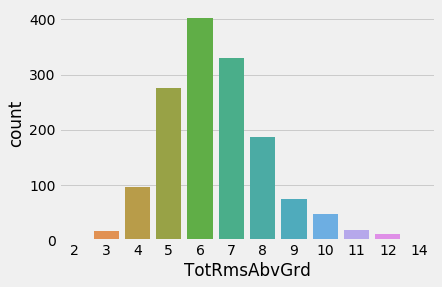

In [19]:
plt.style.use('fivethirtyeight')
sns.countplot(train.TotRmsAbvGrd)

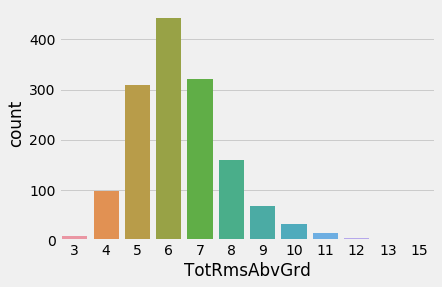

In [20]:
sns.countplot(test.TotRmsAbvGrd)

<h5>1.1.3.3. Distribution of the Fireplaces variable</h5>

In [21]:
train.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

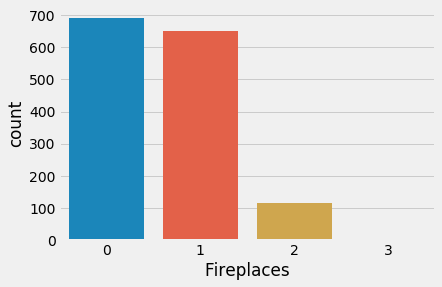

In [22]:
sns.countplot(train.Fireplaces)

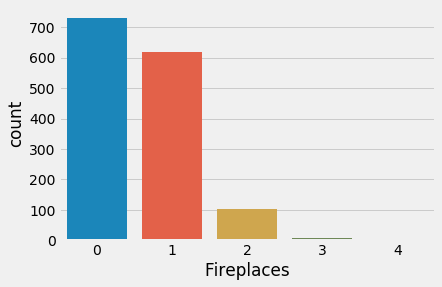

In [23]:
sns.countplot(test.Fireplaces)

<h5>1.1.3.4. Distribution of the Heating variable</h5>

In [24]:
train.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

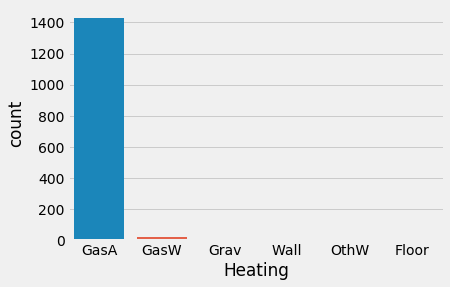

In [25]:
sns.countplot(train.Heating)

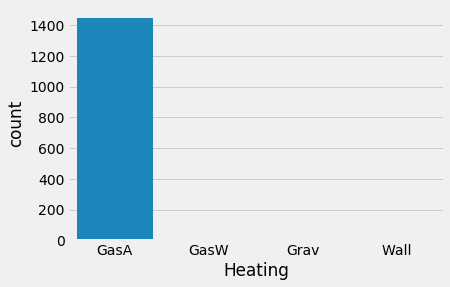

In [26]:
sns.countplot(test.Heating)

<h5>1.1.3.5. Distribution of the PoolQC variable</h5>

In [27]:
train.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

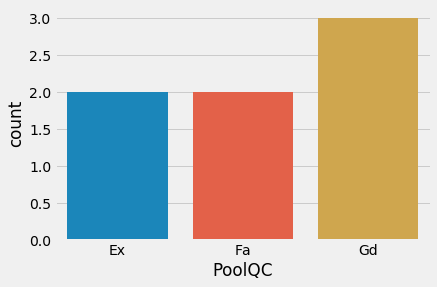

In [28]:
sns.countplot(train.PoolQC)

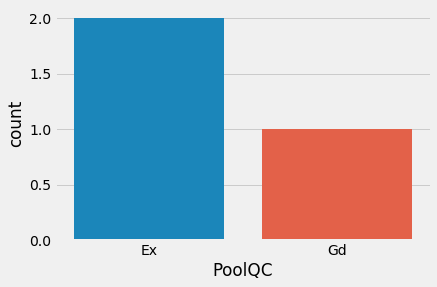

In [29]:
sns.countplot(test.PoolQC)

<h5>1.1.3.6. Distribution of the GarageCars variable</h5>

In [30]:
train.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

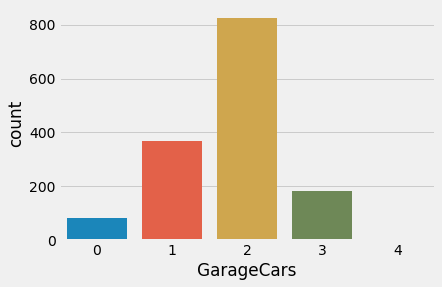

In [31]:
sns.countplot(train.GarageCars)

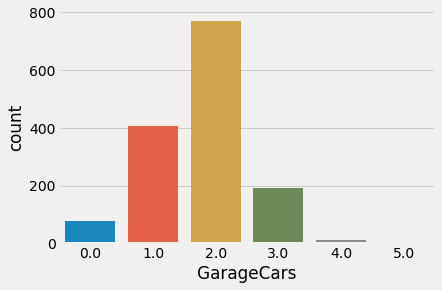

In [32]:
sns.countplot(test.GarageCars)

<h5>1.1.3.7. Distribution of the LotArea variable</h5>

In [33]:
train.LotArea.value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
3182      7
7800      6
8450      6
10000     5
4500      5
4435      5
5000      5
10140     5
9750      5
10400     5
5400      5
7018      4
11700     4
9375      4
8800      4
9900      4
8750      4
6600      4
         ..
3136      1
13418     1
10448     1
8849      1
7313      1
11425     1
13472     1
8029      1
11952     1
9738      1
12936     1
5271      1
11414     1
12122     1
9364      1
7314      1
9360      1
16226     1
11404     1
15498     1
9353      1
11400     1
14175     1
7301      1
11394     1
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

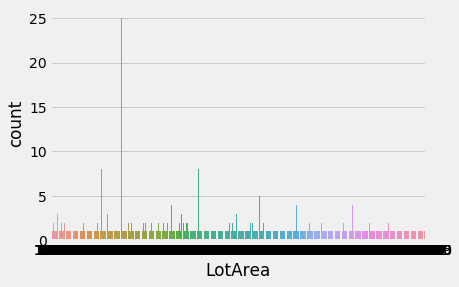

In [34]:
sns.countplot(train.LotArea)

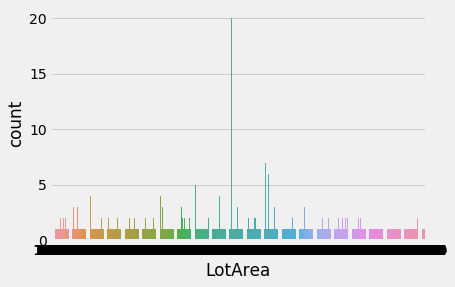

In [35]:
sns.countplot(test.LotArea)

<h5>1.1.3.8. Distribution of the Condition1 variable</h5>

In [36]:
train.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

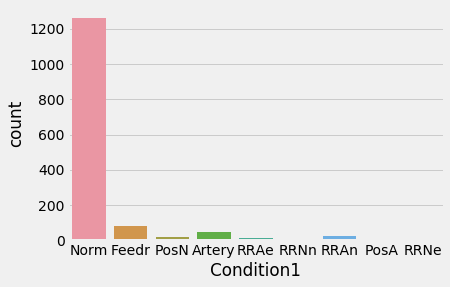

In [37]:
sns.countplot(train.Condition1)

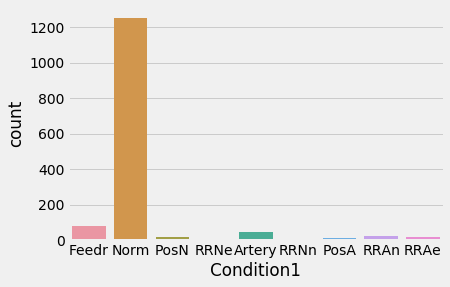

In [38]:
sns.countplot(test.Condition1)

<h5>1.1.3.9. Distribution of the MSSubClass variable</h5>

In [39]:
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

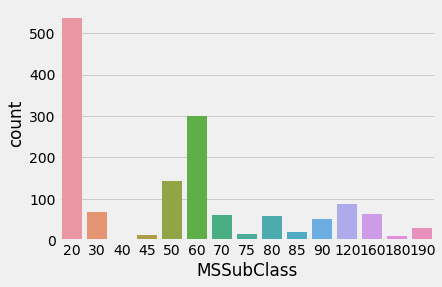

In [40]:
sns.countplot(train.MSSubClass)

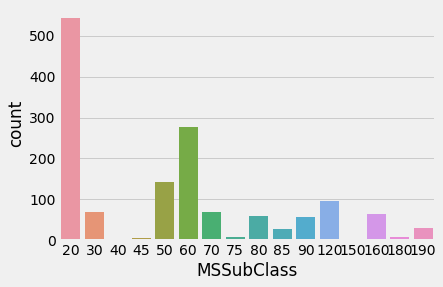

In [41]:
sns.countplot(test.MSSubClass)

<h5>1.1.3.10. Distribution of the GrLiveArea variable</h5>

In [42]:
train.GrLivArea.value_counts()

864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
960      5
1252     5
1710     5
1392     5
988      5
990      5
1656     5
1218     5
1302     5
882      4
        ..
1357     1
1347     1
1453     1
1346     1
1343     1
1342     1
1338     1
1334     1
1327     1
1322     1
1385     1
1386     1
1387     1
1391     1
1446     1
3493     1
1436     1
1434     1
1429     1
1425     1
1411     1
1406     1
1405     1
1402     1
1400     1
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64

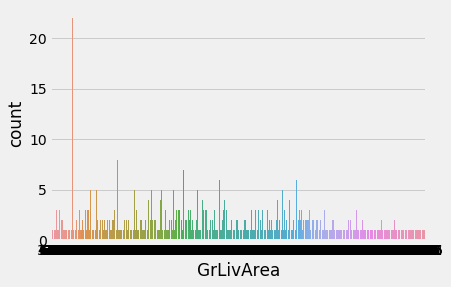

In [43]:
sns.countplot(train.GrLivArea)

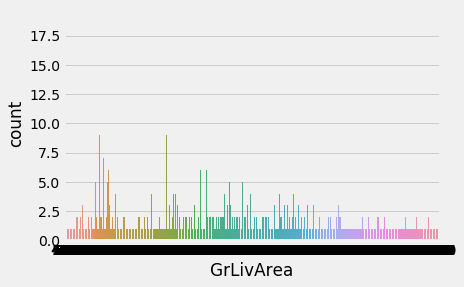

In [44]:
sns.countplot(test.GrLivArea)

<h3>1.2. Bivariate Distribution</h3>
<h4>1.2.1. Numerical Variables</h4>
<h5>1.2.1.1. YearBuilt and SalePrice Analysis</h5>

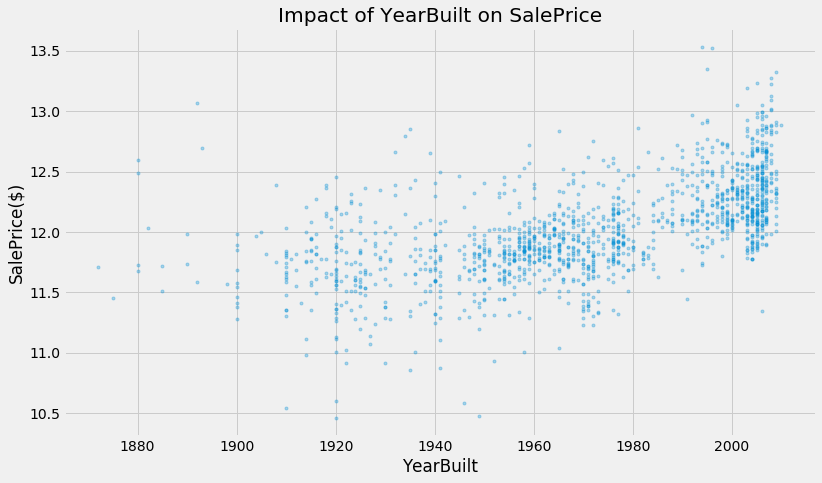

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice($)")
plt.title("Impact of YearBuilt on SalePrice")
plt.plot(train.YearBuilt, train["SalePrice"],'.', alpha = 0.3)

<h5>1.2.1.2. TotRmsAbvGrd and SalePrice Analysis</h5>

In [19]:
train.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [20]:
TotRmsAbvGrd_pivot = train.pivot_table(index='TotRmsAbvGrd', values="SalePrice", aggfunc=np.median)

TotRmsAbvGrd_pivot

,SalePrice
TotRmsAbvGrd,
2,10.578980
3,11.512925
4,11.699405
5,11.777211
6,11.951180
7,12.123234
8,12.206073
9,12.437184
10,12.560244


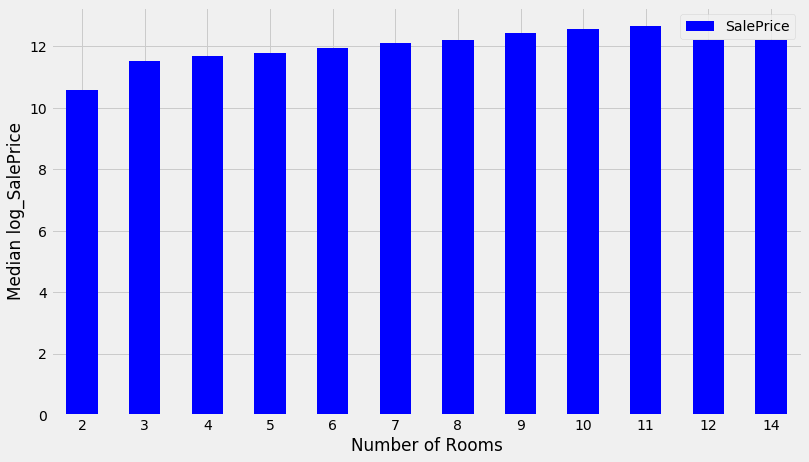

In [21]:
TotRmsAbvGrd_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Number of Rooms')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=0)
plt.show()

<h5>1.2.1.3. Fireplace and log_SalePrice Analysis</h5>

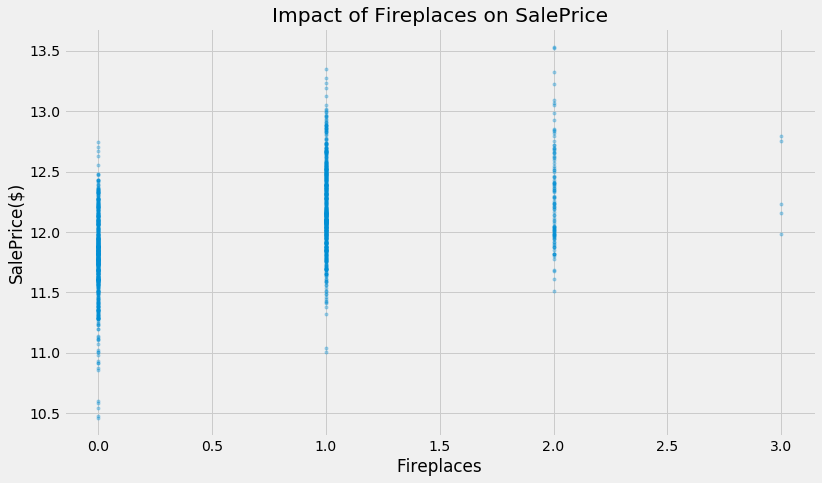

In [23]:
plt.figure(figsize=(12,7))
plt.xlabel("Fireplaces")
plt.ylabel("SalePrice($)")
plt.title("Impact of Fireplaces on SalePrice")
plt.plot(train.Fireplaces, train.SalePrice,'.', alpha = 0.3)

<h5>1.2.1.4. GarageCars and log_SalePrice Analysis</h5>

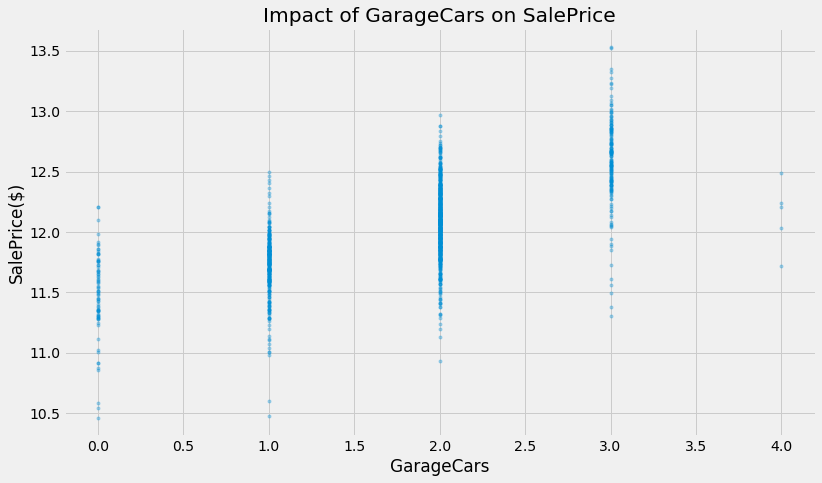

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel("GarageCars")
plt.ylabel("SalePrice($)")
plt.title("Impact of GarageCars on SalePrice")
plt.plot(train.GarageCars, train.SalePrice,'.', alpha = 0.3)

<h5>1.2.1.5. LotArea and log_SalePrice Analysis</h5>

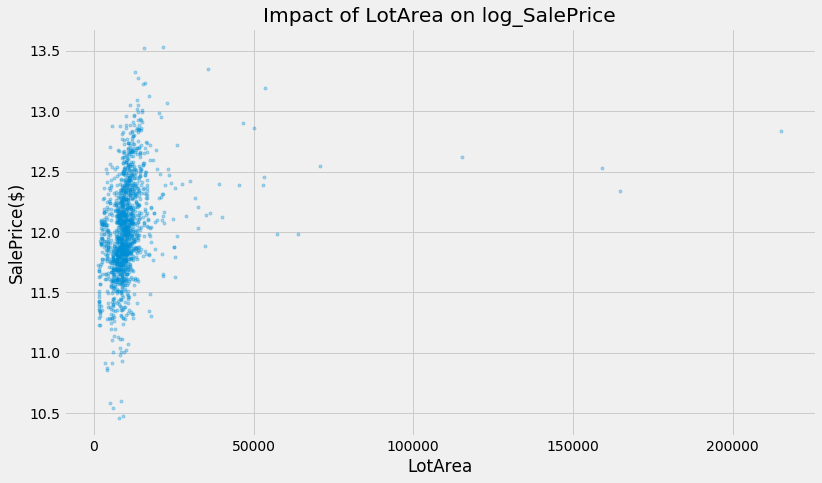

In [26]:
plt.figure(figsize=(12,7))
plt.xlabel("LotArea")
plt.ylabel("SalePrice($)")
plt.title("Impact of LotArea on log_SalePrice")
plt.plot(train.LotArea, train.SalePrice,'.', alpha = 0.3)

<h5>1.2.1.6. OverallQual and log_SalePrice Analysis</h5>

In [55]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [27]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

quality_pivot

,SalePrice
OverallQual,
1,10.798804
2,11.002100
3,11.364900
4,11.589887
5,11.798104
6,11.982929
7,12.206777
8,12.505250
9,12.751300


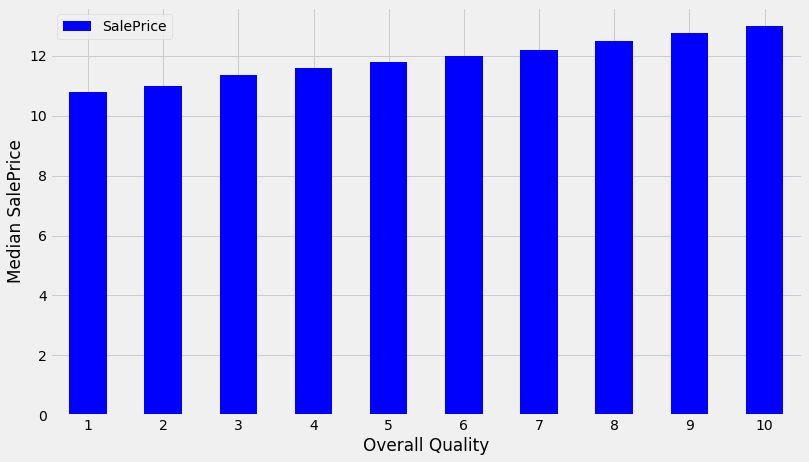

In [29]:
quality_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Overall Quality')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=0)
plt.show()

<h5>1.2.1.7. GrLivArea and SalePrice Analysis</h5>

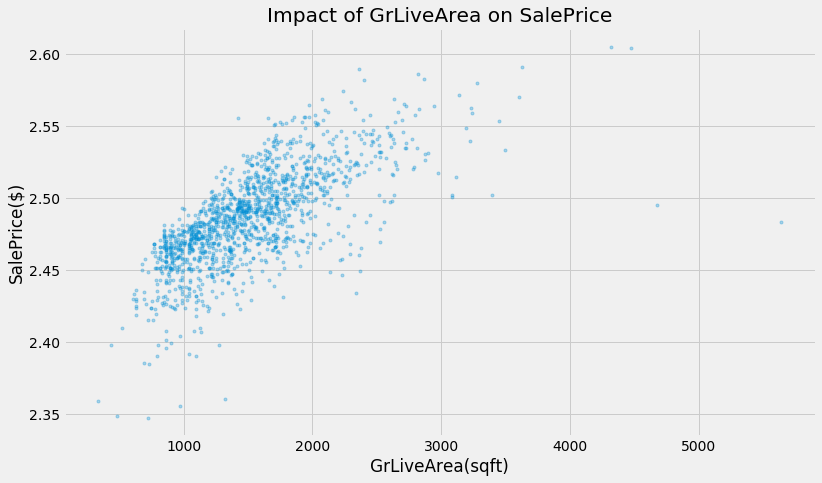

In [30]:
plt.figure(figsize=(12,7))
plt.xlabel("GrLiveArea(sqft)")
plt.ylabel("SalePrice($)")
plt.title("Impact of GrLiveArea on SalePrice")
plt.plot(train.GrLivArea, np.log(train.SalePrice),'.', alpha = 0.3)

<h5>1.2.1.8. Are YearBuilt and GarageYrBlt related?</h5>

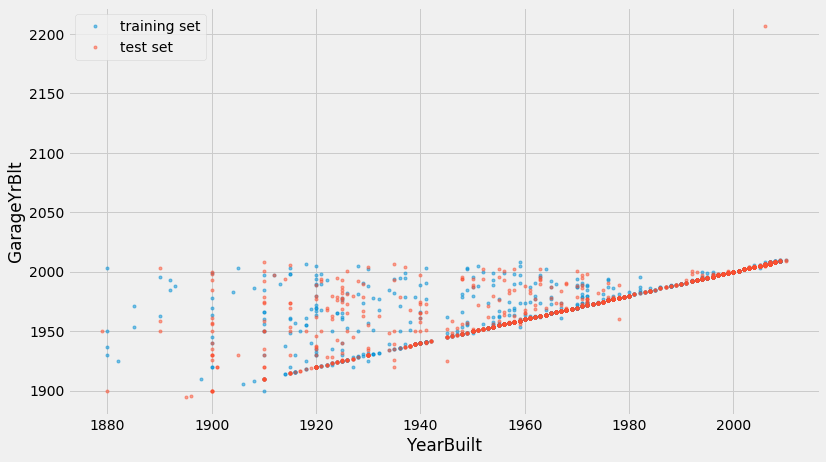

In [31]:
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt")
plt.ylabel("GarageYrBlt")
plt.plot(train.YearBuilt, train.GarageYrBlt,'.', alpha=0.5, label = 'training set')
plt.plot(test.YearBuilt, test.GarageYrBlt,'.', alpha=0.5, label = 'test set') 
plt.legend()


<BarContainer object of 112 artists>

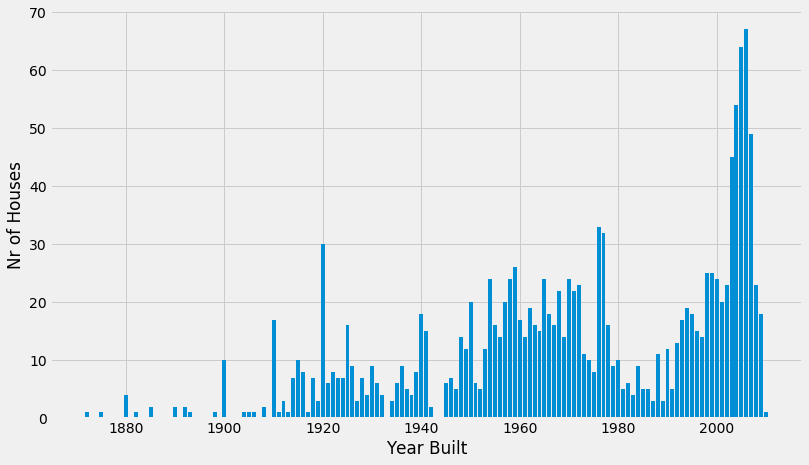

In [67]:
#check the distribution of year built
temp = train['YearBuilt'].value_counts().reset_index(name='YearBuilt')
temp.columns = ['YearBuilt', 'Count']
plt.figure(figsize=(12,7))
plt.xlabel("Year Built")
plt.ylabel("Nr of Houses")
plt.bar(temp["YearBuilt"], temp["Count"])

<BarContainer object of 5 artists>

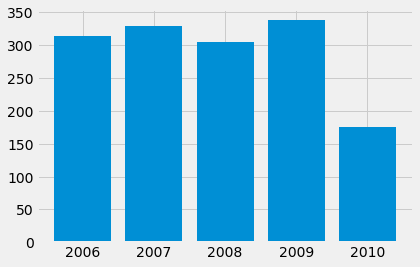

In [56]:
#check the distribution of year sold
temp = train['YrSold'].value_counts().reset_index(name='YrSold')
temp.columns = ['YrSold', 'Count']

plt.bar(temp["YrSold"], temp["Count"])

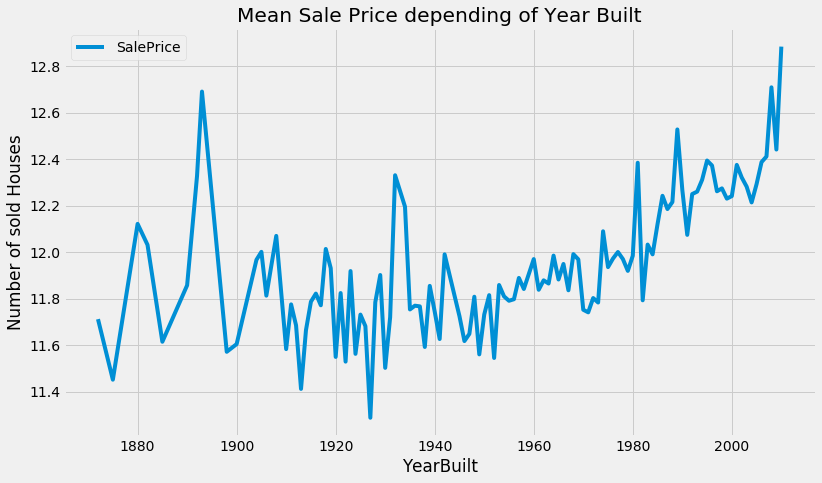

In [63]:
train[['YearBuilt','SalePrice']].groupby(['YearBuilt'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Mean Sale Price depending of Year Built');
plt.ylabel('Number of sold Houses');

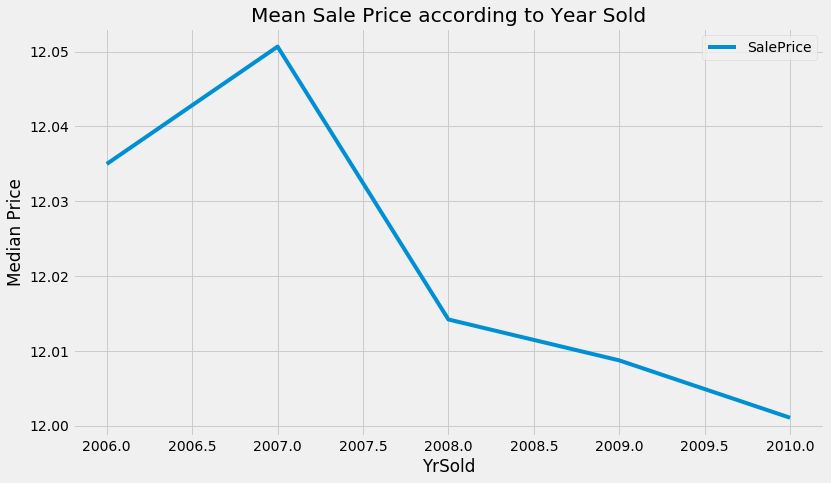

In [68]:
train[['YrSold','SalePrice']].groupby(['YrSold'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Mean Sale Price according to Year Sold');
plt.ylabel('Median Price');

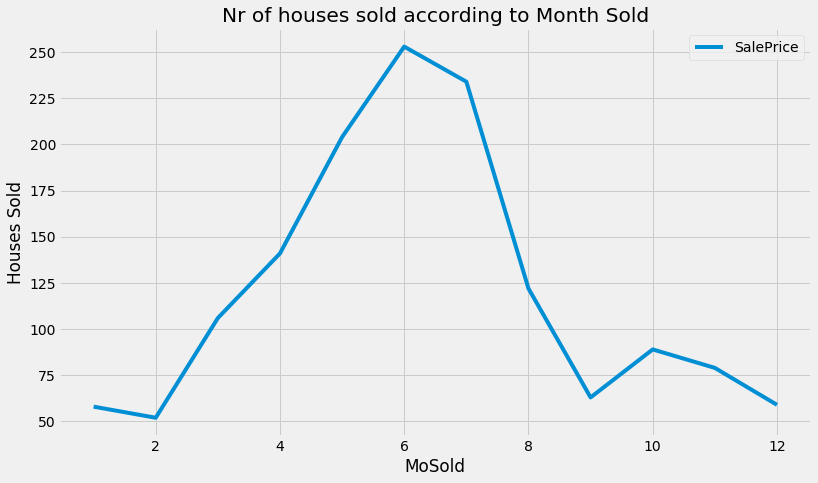

In [72]:
train[['MoSold','SalePrice']].groupby(['MoSold'], as_index=True).count().plot(figsize=(12,7))
plt.title('Nr of houses sold according to Month Sold');
plt.ylabel('Houses Sold');

<h4>1.2.2. Categorial Variables</h4>
<h5>1.2.2.1. Impact of Neighbourhood on SalesPrice</h5>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

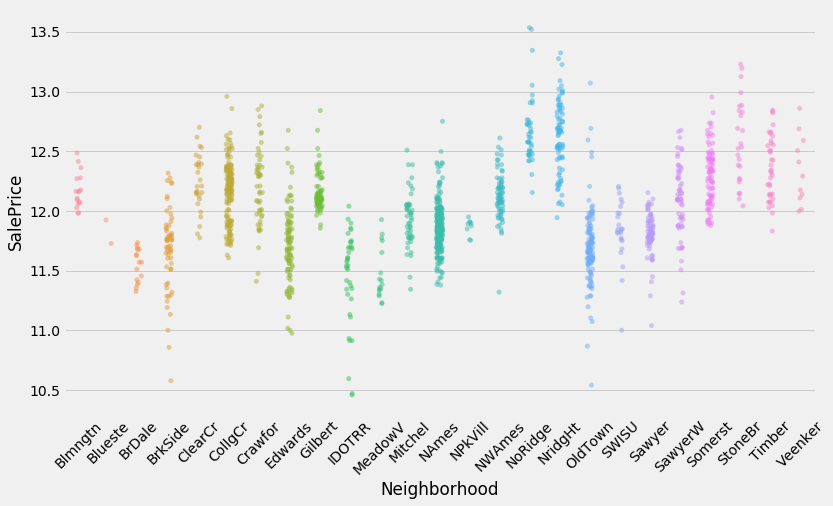

In [73]:
plt.figure(figsize=(12,7))
sns.stripplot(x = train.Neighborhood, y = train.SalePrice,
              order = np.sort(train.Neighborhood.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

In [74]:
Neighborhood_meanSP =train.groupby('Neighborhood')['SalePrice'].mean()
Neighborhood_meanSP.sort_values()

Neighborhood
IDOTRR     11.446889
MeadowV    11.474522
BrDale     11.547864
BrkSide    11.679727
OldTown    11.703865
Edwards    11.712312
Sawyer     11.811468
Blueste    11.826536
SWISU      11.838435
NPkVill    11.866477
NAmes      11.868045
Mitchel    11.933948
SawyerW    12.090689
NWAmes     12.130609
Gilbert    12.155803
CollgCr    12.163641
Blmngtn    12.169416
Crawfor    12.206659
ClearCr    12.239900
Somerst    12.296495
Veenker    12.344176
Timber     12.363455
StoneBr    12.585486
NridgHt    12.619411
NoRidge    12.676000
Name: SalePrice, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

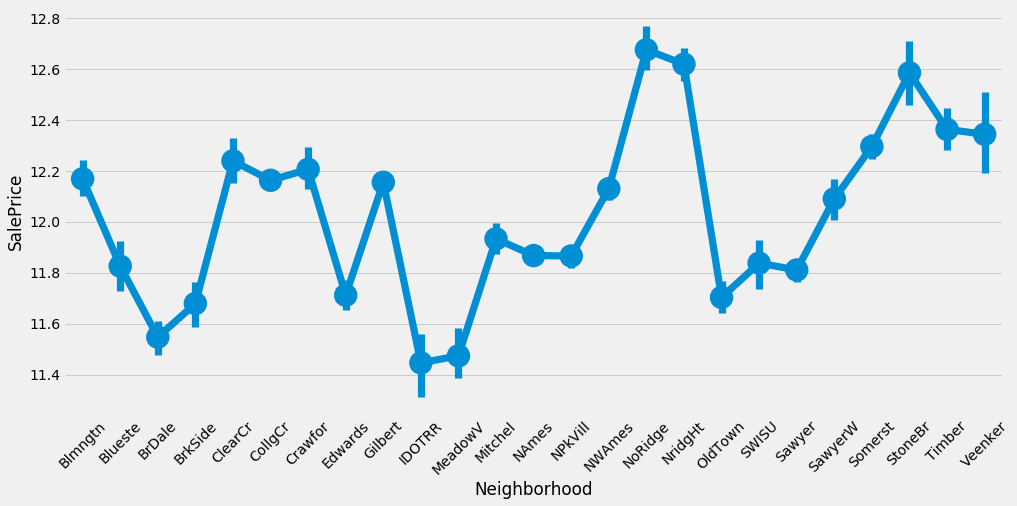

In [76]:
plt.figure(figsize=(15,7))
sns.pointplot(x = train.Neighborhood, y = train.SalePrice,order = Neighborhood_meanSP.index)
plt.xticks(rotation=45)

<h5>1.2.2.2. Impact of Heating on SalesPrice</h5>

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

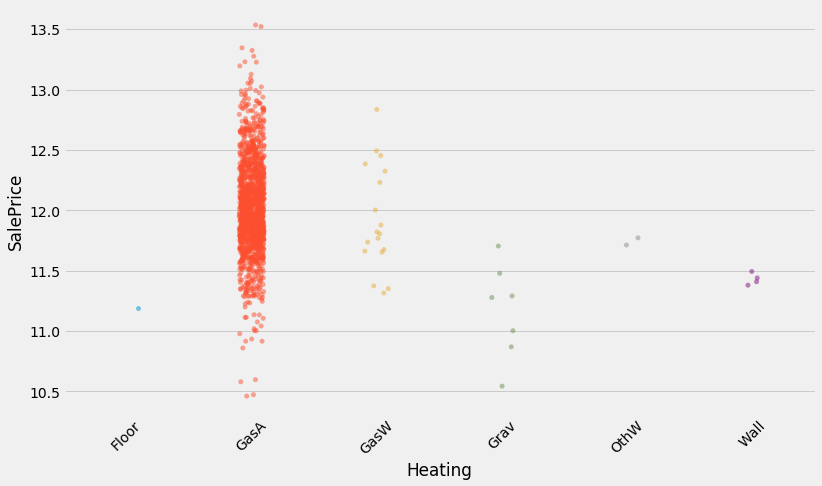

In [78]:
plt.figure(figsize=(12,7))
sns.stripplot(x = train.Heating, y = train.SalePrice,
              order = np.sort(train.Heating.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

<h5>1.2.2.3. Impact of Condition1 on SalesPrice</h5>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

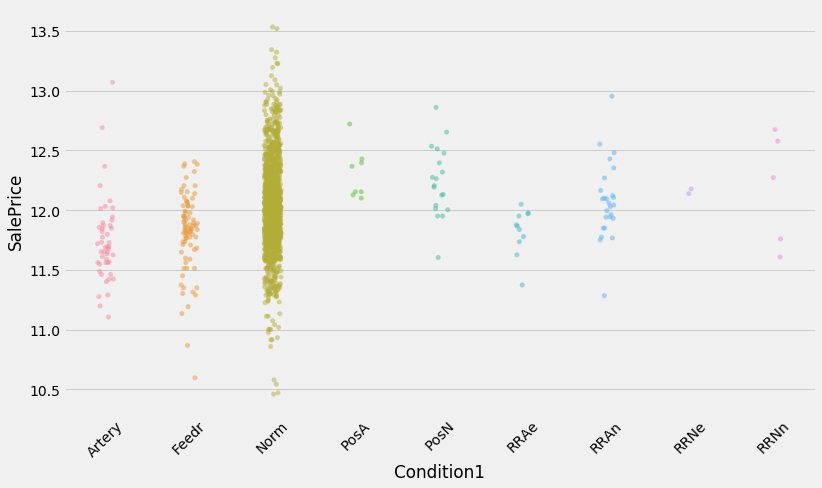

In [79]:
plt.figure(figsize=(12,7))
sns.stripplot(x = train.Condition1, y = train.SalePrice,
              order = np.sort(train.Condition1.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

<h2>2. Data Pre-Processing</h2>

In [17]:

# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True, sort = False)

print(train.shape, test.shape, data.shape)


(1460, 82) (1459, 81) (2919, 82)


<h3>2.1. Outlier values</h3>

In [18]:
#dealing with outliers. Kaggle demands that the final submission has all the houses
GrLivArea_mean = data['GrLivArea'].mean()
func = lambda x: x['GrLivArea'] > 4000 and GrLivArea_mean or x['GrLivArea']
data['GrLivArea'] = data.apply(func,axis=1).astype(float)



In [19]:
LotArea_mean = data['LotArea'].mean()
func = lambda x: x['LotArea'] > 50000 and LotArea_mean or x['LotArea']
data['LotArea'] = data.apply(func,axis=1).astype(float)

<h3>2.2. Analysing Null or missing Values</h3>

In [20]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[null_values >= 30]

Alley          93.216855
FireplaceQu    48.646797
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
SalePrice      49.982871
dtype: float64

In [21]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[(null_values > 0) & (null_values < 30)]

MSZoning         0.137033
LotFrontage     16.649538
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
SaleType         0.034258
dtype: float64

<h3>2.3. Imputing Missing Values</h3>
<h4>2.3.1. Imputing the value 'None'</h4>

In [22]:
imputing_none = data[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType',
                    'GarageFinish', 'GarageQual', 'GarageCond','PoolQC','Fence','MiscFeature']]
for i in list(imputing_none.columns.values):
    print("\n")
    print("Analysing the " + i)
    print(imputing_none[i].value_counts())



Analysing the Alley
Grvl    120
Pave     78
Name: Alley, dtype: int64


Analysing the BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64


Analysing the BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64


Analysing the BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64


Analysing the BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64


Analysing the BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


Analysing the FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64


Analysing the GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64


Analysing the GarageFinish
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64




In [23]:
data.update(imputing_none.fillna("None"))


In [24]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[null_values > 0]

MSZoning         0.137033
LotFrontage     16.649538
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SaleType         0.034258
SalePrice       49.982871
dtype: float64

<h4>2.3.2. Imputing Zero</h4>

In [25]:
imputing_zero = data[['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GarageArea',
                        'GarageCars']]
for i in list(imputing_zero.columns.values):
    print("")
    print("Analysing the " + i) 
    print(imputing_zero[i].value_counts())


Analysing the BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

Analysing the BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

Analysing the TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1


In [26]:
data.update(imputing_zero.fillna(0.0))

In [27]:
data.update(data['GarageYrBlt'].fillna(data.YearBuilt))

In [28]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[null_values > 0]

MSZoning        0.137033
LotFrontage    16.649538
Utilities       0.068517
Exterior1st     0.034258
Exterior2nd     0.034258
MasVnrType      0.822199
MasVnrArea      0.787941
Electrical      0.034258
KitchenQual     0.034258
Functional      0.068517
SaleType        0.034258
SalePrice      49.982871
dtype: float64

<h4>2.3.3. Missing at random</h4>
<h5>2.3.3.1. Imputing the Mode</h5>

In [29]:
catfeats_fillnamode = \
    ['Electrical', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities',
     'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
 
data.loc[:, catfeats_fillnamode] = \
    data[catfeats_fillnamode].fillna(data[catfeats_fillnamode].mode().iloc[0])

In [30]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[null_values > 0]

LotFrontage    16.649538
MasVnrArea      0.787941
SalePrice      49.982871
dtype: float64

<h4>2.3.4. Impute the Median</h4>

In [31]:
Type_median_Area = data.pivot_table(index ="MasVnrType", values ="MasVnrArea" , aggfunc = "median")

def impute_median_neigh(cols):
    Mas_Vnr_Area = cols[0]
    Mas_Vnr_Type = cols[1]
    
    if pd.isnull(Mas_Vnr_Area):
        return Type_median_Area["MasVnrArea"][Type_median_Area.index == Mas_Vnr_Type]
    else:
        return Mas_Vnr_Area

print ('Original #missing: %d'%sum(data["MasVnrArea"].isnull()))
data["MasVnrArea"] = data[["MasVnrArea","MasVnrType"]].apply(impute_median_neigh,axis=1).astype(float)
print ('Final #missing: %d'%sum(data["MasVnrArea"].isnull()))

Original #missing: 23
Final #missing: 0


In [32]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[null_values > 0]

LotFrontage    16.649538
SalePrice      49.982871
dtype: float64

In [33]:
neigh_median_lot = data.pivot_table(index ="Neighborhood", values ="LotFrontage" , aggfunc = "median")

def impute_median_neigh(cols):
    LotFrontage = cols[0]
    Neighborhood = cols[1]
    
    if pd.isnull(LotFrontage):
        return neigh_median_lot["LotFrontage"][neigh_median_lot.index == Neighborhood]
    else:
        return LotFrontage

print ('Original #missing: %d'%sum(data["LotFrontage"].isnull()))
data["LotFrontage"] = data[["LotFrontage","Neighborhood"]].apply(impute_median_neigh,axis=1).astype(float)
print ('Final #missing: %d'%sum(data["LotFrontage"].isnull()))


Original #missing: 486
Final #missing: 0


In [34]:
null_values = data.isnull().sum()/data.shape[0]*100
null_values[null_values > 0]

SalePrice    49.982871
dtype: float64

<h3>2.4. Log transform skewed numeric features</h3>

In [35]:
#log transform skewed numeric features:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: pd.DataFrame.skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

<h3>2.5. Dropping features that showed high correlation</h3>

In [36]:
data.drop(["GarageArea","1stFlrSF","TotRmsAbvGrd"],axis =1, inplace = True)

<h3>2.6. Non-numerical Features</h3>

In [37]:
data.dtypes.value_counts()

object     44
float64    24
int64      11
dtype: int64

In [38]:
data.select_dtypes(include = [object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'source'],
      dtype='object')

<h3>2.4.1. Ordinal Features</h3>

In [39]:
data.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [40]:
data.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [41]:
data.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [42]:
data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [43]:
data.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [44]:
data.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [45]:
data.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [46]:
data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

In [47]:
data.BsmtCond.unique()

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

In [48]:
data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

In [49]:
data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)

In [50]:
data.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [51]:
data.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [52]:
data.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [53]:
data.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [54]:
data.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [55]:
data.FireplaceQu.unique()

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [56]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)

In [57]:
data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [58]:
data.GarageCond.unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [59]:
data.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

In [60]:
data.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [61]:
data.Fence.unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [62]:
data.LotShape = data.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
data.Utilities = data.Utilities.replace({'AllPub':0, 'NoSeWa':1})
data.LandSlope = data.LandSlope.replace({'Gtl':0, 'Mod':1, 'Sev':2})
data.ExterQual = data.ExterQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
data.ExterCond = data.ExterCond.replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
data.BsmtQual = data.BsmtQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'None':3,'Fa':4})
data.BsmtCond = data.BsmtCond.replace({'TA':0, 'Gd':1, 'None':2, 'Fa':3,'Po':4})
data.BsmtExposure = data.BsmtExposure.replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'None':4})
data.BsmtFinType1 = data.BsmtFinType1.replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'None':5, 'LwQ':6})
data.BsmtFinType2 = data.BsmtFinType2.replace({'Unf':0, 'BLQ':1, 'None':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
data.HeatingQC = data.HeatingQC.replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
data.Electrical = data.Electrical.replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
data.KitchenQual = data.KitchenQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
data.Functional = data.Functional.replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6})
data.FireplaceQu = data.FireplaceQu.replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
data.GarageFinish = data.GarageFinish.replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3})
data.GarageQual = data.GarageQual.replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
data.GarageCond = data.GarageCond.replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
data.PavedDrive = data.PavedDrive.replace({'Y':0, 'N':1, 'P':2})
data.PoolQC = data.PoolQC.replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})
data.Fence = data.Fence.replace({'None':0, 'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4})

<h3>2.4.2. Categorical Features - One-Hot Encoding</h3>

In [69]:

data.Heating = data.Heating.replace({'GasW':"Others", 'Grav':"Others", 'Wall':"Others", 'OthW':"Others", 'Floor':"Others"})
data.Condition1 = data.Condition1.replace({'RRAn':"Others", 'PosN':"Others", 'RRAe':"Others", 'PosA':"Others", 'RRNn':"Others",'RRNe':"Others"})


In [70]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
var_mod = ["MSZoning", "Street", "Alley" ,"LandContour" ,"LotConfig", "Neighborhood", "Condition1" ,"Condition2", "BldgType",
           "HouseStyle" ,"RoofStyle", "RoofMatl" ,"Exterior1st" ,"Exterior2nd", "MasVnrType", "Foundation" ,"Heating",
           "CentralAir", "GarageType" ,"MiscFeature" ,"SaleType" ,"SaleCondition"]

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [71]:
#Dummy Variables:
data = pd.get_dummies(data, columns = var_mod)

data.dtypes

Id                   int64
MSSubClass         float64
LotFrontage        float64
LotArea            float64
LotShape             int64
Utilities            int64
LandSlope            int64
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
MasVnrArea         float64
ExterQual            int64
ExterCond            int64
BsmtQual             int64
BsmtCond             int64
BsmtExposure         int64
BsmtFinType1         int64
BsmtFinSF1         float64
BsmtFinType2         int64
BsmtFinSF2         float64
BsmtUnfSF          float64
TotalBsmtSF        float64
HeatingQC            int64
Electrical           int64
2ndFlrSF           float64
LowQualFinSF       float64
GrLivArea          float64
BsmtFullBath       float64
BsmtHalfBath       float64
                    ...   
Heating_1            uint8
CentralAir_0         uint8
CentralAir_1         uint8
GarageType_0         uint8
GarageType_1         uint8
GarageType_2         uint8
G

In [72]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,source,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LandContour_0,LandContour_1,LandContour_2,LandContour_3,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition2_0,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Heating_0,Heating_1,CentralAir_0,CentralAir_1,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,4.110874,4.189655,9.042040,0,0,0,7,5,2003,2003,5.283204,0,0,0,0,0,0,6.561031,0,0.0,5.017280,6.753438,0,0,6.751101,0.0,7.444833,1.0,0.000000,2,1,3,0.693147,0,0,0,0,2003.0,0,2.0,0,0,0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0,0,0.0,2,2008,12.247694,train,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,0,0,0,6,8,1976,1976,0.000000,1,0,0,0,1,1,6.886532,0,0.0,5.652489,7.141245,0,0,0.000000,0.0,7.141245,0.0,0.693147,2,0,3,0.693147,1,0,1,1,1976.0,0,2.0,0,0,0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,5,2007,12.109011,train,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,1,0,0,7,5,2001,2002,5.093750,0,0,0,0,2,0,6.188264,0,0.0,6.075346,6.825460,0,0,6.765039,0.0,7.488294,1.0,0.000000,2,1,3,0.693147,0,0,1,1,2001.0,0,2.0,0,0,0,0.000000,3.761200,0.000000

<h2>3. Feature Engineering</h2>
<h3>3.1.Remodeled (categorical) </h3>

In [73]:
data['Remodeled'] = data['YearRemodAdd'] - data['YearBuilt']
func = lambda x: x['Remodeled'] > 0 and 1.0 or 0.0
data['Remodeled'] = data.apply(func,axis=1).astype(float)

<h3>3.2. New House (categorical)</h3>

In [74]:
data['NewHouse'] = data['YrSold'] - data['YearBuilt']
func = lambda x: x['NewHouse'] == 0 and 1.0 or 0.0
data['NewHouse'] = data.apply(func,axis=1).astype(float)

<h3>3.4. Total Area (continuous)</h3>

In [77]:
data['OverallSF'] = data['2ndFlrSF'] + data['TotalBsmtSF']

<h3>3.5. Simplifing existing features</h3>

In [78]:
# 1* Simplifications of existing features
data["SimplOverallQual"] = data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplOverallCond"] = data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplPoolQC"] = data.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
data["SimplGarageCond"] = data.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplGarageQual"] = data.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFunctional"] = data.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
data["SimplKitchenQual"] = data.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplHeatingQC"] = data.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplBsmtFinType1"] = data.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtFinType2"] = data.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtCond"] = data.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplBsmtQual"] = data.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplExterCond"] = data.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplExterQual"] = data.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

<h3>3.6.Exporting Data</h3>

In [79]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['SalePrice','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)


C:\Users\Utilizador\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<h2>4. Modeling</h2>

In [173]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

#Define target and ID columns:
target = 'SalePrice'
IDcol = ['Id','SalePrice']

In [193]:

from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.7g" % np.sqrt(metrics.mean_squared_error((np.exp(dtrain[target])).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = np.exp(alg.predict(dtest[predictors]))
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<h3>4.1.Linear Regression Model</h3>

In [194]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Id','SalePrice'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 197572.4
CV Score : Mean - 1.188e+12 | Std - 1.53e+12 | Min - 0.1038 | Max - 4.776e+12


<h3>4.2.Ridge Regression Model</h3>

In [195]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_df[predictors], train_df[target],
                                   scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [196]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()for alpha in alphas]

Text(0,0.5,'rmse')

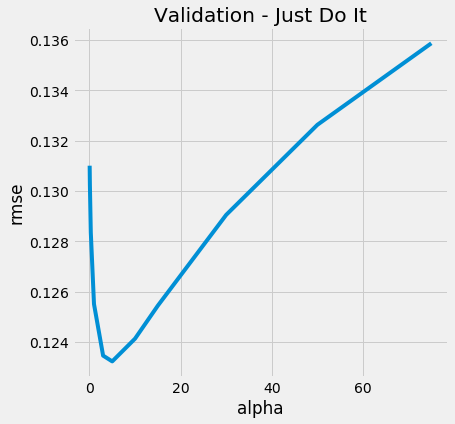

In [197]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [198]:
cv_ridge.min()

0.12322661404429944

In [201]:
RR = Ridge(alpha=0.123)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 197572.4
CV Score : Mean - 0.1288 | Std - 0.01838 | Min - 0.1016 | Max - 0.1662


<h3>4.3.Lasso Regression Model</h3>

In [202]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [203]:
rmse_cv(model_lasso).mean()

0.11979885738215783

In [88]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [89]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 105 variables and eliminated the other 123 variables


In [90]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

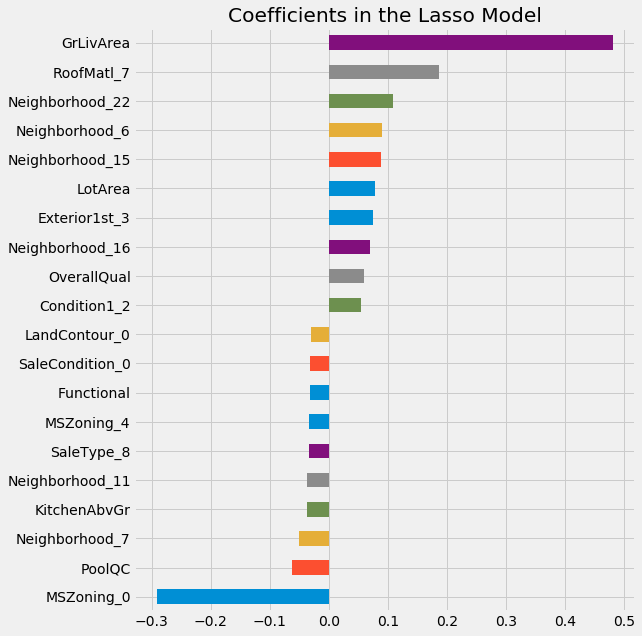

In [91]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

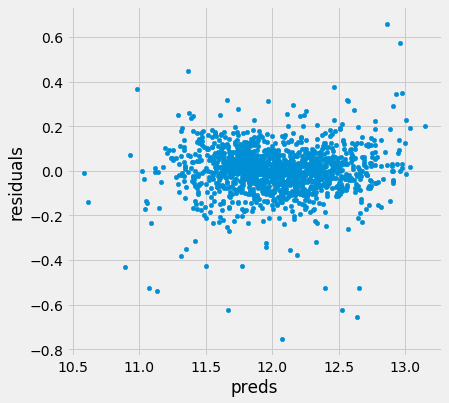

In [92]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

<h3>4.4 Adding an xgboost model:</h3>

In [93]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

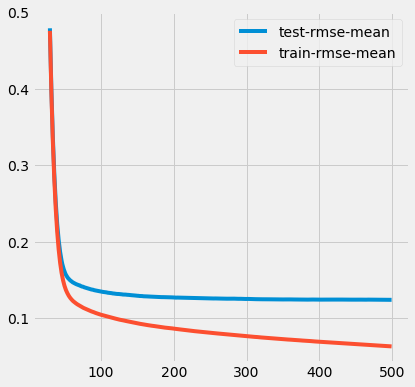

In [94]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [95]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

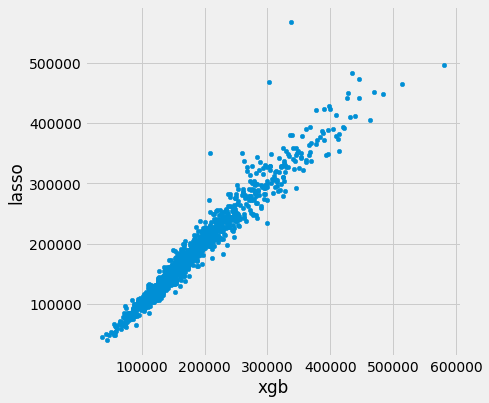

In [97]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score although in this case it doesn't help that much.

In [98]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [99]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)